**Inclass material for Week 3: Data Wrangling and Visualization**

This notebook was made based on main materials `3_Reshaping_Visualization.ipynb`

Version: Newton - February 2021

---
**START OF DAY 1**

# Data Wrangling and Visualization

Berikut adalah method yang telah kita pelajari di dua course sebelumnya:

**Data Inspection** (Course: Python for Data Analysts)
- `.head()` and `.tail()`
- `.describe()`
- `.shape` and `.size`
- `.axes`
- `.dtypes`
- Subsetting using `.loc`, `.iloc` and conditionals

**Diagnostic and Exploratory** (Course: Exploratory Data Analysis)
- Tables
- Cross-Tables and Aggregates
- Using `aggfunc` for aggregate functions
- Pivot Tables
- Working with DateTime
- Working with Categorical Data
- Duplicates and Missing Value Treatment

---

**Training Objectives for Course Data Wrangling and Visualization**

- Working with MultiIndex DataFrames
- Stacking and Unstacking
- Reshaping your DataFrame with Melt
- Using Group By Effectively
- Visual Data Exploratory

# Reproducible Environment

Bayangkan Anda sedang mengerjakan suatu proyek yang membutuhkan kolaborasi dengan tim. Proyek tersebut diinisiasi oleh Anda, code dan packages pada komputer Anda berjalan dengan baik. Kemudian Anda ingin membagikan proyek tersebut kepada tim Anda. Apakah tim Anda harus melakukan instalasi package satu per satu secara manual? Tentu tidak, di sini Anda membuat suatu **environment** yang dapat di-reproducible (digandakan) dengan membuat suatu file `requirements.txt`.

Lihat pada folder `/assets`, Anda akan menemukan file `requirements.txt` yang isinya seperti ini:
```
backcall==0.1.0
certifi==2019.11.28
chardet==3.0.4
cycler==0.10.0
decorator==4.4.0
idna==2.9
ipython==7.7.0
...
```

File ini berisi daftar **packages beserta versinya** yang ada di environment dalam menjalankan proyek tertentu. File ini membantu tim Anda untuk mengembangkan suatu aplikasi dalam satu versi yang sama, sehingga mencegah terjadinya perubahan fungsi-fungsi yang tidak terduga.

## Importing Requirements

Misal Anda yang meneruskan proyek dan telah menerima file `txt` dari tim Anda, maka lakukanlah langkah berikut:

### File `txt`

1. Siapkan environment yang kosong
```
conda create -n <ENV_NAME> python=<PYTHON_VERSION>
```

2. Aktifkan environment tersebut
```
conda activate <ENV_NAME>
```

3. Navigasikan path ke folder di mana file `requirements_dwv.txt` berada
```
cd <PATH_TO_REQUIREMENTS>
```

4. Instalasi packages dari file tersebut
```
pip install -r requirements_dwv.txt
```

### (Optional) File `yml`

1. Navigasikan path ke folder di mana file `environment.yml` berada
```
cd <PATH_TO_ENVIRONMENT>
```

2. Ketikkan command berikut di base environment:
```
conda env create -f environment.yml
```

Reference: [Creating an environment from yml file](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-from-an-environment-yml-file)

⚠️ Jangan lupa instalasi kernel di dalam environment tersebut apabila ingin dapat diakses menggunakan jupyter notebook:
```
pip install ipykernel
python -m ipykernel install --user --name=<ENV_NAME>
```

## Exporting Requirements

Misal Anda ingin membagikan daftar packages suatu environment kepada tim Anda, maka lakukanlah langkah berikut:

1. Aktifkan environment
```
conda activate <ENV_NAME>
```

2. Navigasikan path ke folder tempat di mana file `requirements.txt` ingin disimpan
```
cd <PATH_TO_REQUIREMENTS_FOLDER>
```

3. Export environment

    - File `txt`: Command `freeze` digunakan untuk export daftar packages beserta versinya dalam format tertentu.
    ```
    pip freeze > requirements.txt
    ```

    - (Optional) File `yml`:
    ```
    conda env export > environment.yml
    ```

💡 Anda dapat menyimpan file dengan nama lain, namun sebagai **konvensi** biasa digunakan penamaan `requirements.txt` ataupun `environment.yml`.

# Data Wrangling and Reshaping

## Load Data

### `pandas_datareader`

Kita akan menggunakan library `pandas_datareader` untuk mengakses data saham yang tersedia pada [Yahoo! Finance](https://finance.yahoo.com/). Penarikan data menggunakan `pandas_datareader` membutuhkan koneksi internet.

Dokumentasi: https://pydata.github.io/pandas-datareader/

In [1]:
from pandas_datareader import data
import pandas as pd

In [2]:
# symbol = ['BBCA.JK', 'UNVR.JK']
# source = 'yahoo'
# start_date = '2021-01-04'
# end_date = '2021-02-19'
# stock = data.DataReader(symbol, source, start_date, end_date)
# stock.tail()

Source:
- `AAPL`: Apple Inc.
- `FB`: Facebook, Inc.
- `GOOGL`: Alphabet Inc. (Google)

Data description:
- `Date` - specifies trading date in `yyyy-mm-dd` format
- `High` - maximum price of the day
- `Low` - minimum price of the day
- `Open` - opening price at the start of the day
- `Close` - closing price at the end of the day
- `Adj Close` - adjusted closing price for both dividends and splits
- `Volume` - the number of shares that changed hands during a given day

The trading hours of [different stock markets differ](https://www.maybank-ke.com.sg/markets/markets-listing/trading-hours/) (the NYSE for example open its market floor from 9.30am to 4pm five days a week).

### File Pickle

Pickling/Serializing: **menyimpan** suatu objek Python ke sebuah file binary (byte stream).
- Gunakan method `.to_pickle()`
- Contohnya objek DataFrame `stock` disimpan sebagai file `stock_2`:

In [3]:
# stock.to_pickle('data_cache/stock_2')
# kemudian silahkan cek file pickle pada folder di mana file .ipynb ini berada

Unpickling/De-serializing: **membaca** suatu objek Python dari sebuah file binary (byte stream). 
- Gunakan method `pd.read_pickle()`
- Untuk selanjutnya, mari kita gunakan file pickle pada `data_cache/stock` yang untuk tanggal 2 Januari 2018 sampai 24 April 2019.

In [4]:
stock = pd.read_pickle('data_cache/stock')
stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961

💡 Tips: Dengan menggunakan file pickle kita "mengawetkan" struktur dari object Python, misal untuk DataFrame dapat terjaga tipe data dan indexnya.

In [5]:
# membuat dummy data lalu konversi tipe data
dummy = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'gender': ['Male', 'Female', 'Male', 'Female'],
    'join_date': ['22 Feb 2021', '23 Feb 2021', '24 Feb 2021', '25 Feb 2021']
})
dummy['gender'] = dummy['gender'].astype('category')
dummy['join_date'] = dummy['join_date'].astype('datetime64')
dummy.dtypes

id                    int64
gender             category
join_date    datetime64[ns]
dtype: object

In [6]:
dummy

,id,gender,join_date
0,1,Male,2021-02-22
1,2,Female,2021-02-23
2,3,Male,2021-02-24
3,4,Female,2021-02-25


In [7]:
# simpan ke pickle
dummy.to_pickle('data_cache/dummy')

# baca dari pickle dan cek tipe data
pd.read_pickle('data_cache/dummy').dtypes

id                    int64
gender             category
join_date    datetime64[ns]
dtype: object

Bandingkan dengan menyimpannya ke file text biasa, yaitu csv misalnya:

In [8]:
# simpan ke file csv
dummy.to_csv('data_cache/dummy.csv', index=False)

# baca dari csv dan cek tipe data
pd.read_csv('data_cache/dummy.csv').dtypes

id            int64
gender       object
join_date    object
dtype: object

Note:

- file pickle cenderung lebih kecil file sizenya dibandingkan file csv (apabila data sudah cukup besar)
- file pickle ini hanya dapat di load menggunakan bahasa Python

## Slicing Multi-Index DataFrame
Perhatikan bahwa `stock` adalah Multi-Index DataFrame, dimana level dari column-nya terdiri dari: `Attributes` dan `Symbols`:

In [9]:
stock.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15',
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-22',
               '2019-04-23', '2019-04-24'],
              dtype='datetime64[ns]', name='Date', length=329, freq=None)

In [10]:
stock.columns

MultiIndex([(     'High',  'AAPL'),
            (     'High',    'FB'),
            (     'High', 'GOOGL'),
            (      'Low',  'AAPL'),
            (      'Low',    'FB'),
            (      'Low', 'GOOGL'),
            (     'Open',  'AAPL'),
            (     'Open',    'FB'),
            (     'Open', 'GOOGL'),
            (    'Close',  'AAPL'),
            (    'Close',    'FB'),
            (    'Close', 'GOOGL'),
            (   'Volume',  'AAPL'),
            (   'Volume',    'FB'),
            (   'Volume', 'GOOGL'),
            ('Adj Close',  'AAPL'),
            ('Adj Close',    'FB'),
            ('Adj Close', 'GOOGL')],
           names=['Attributes', 'Symbols'])

Ketika kita subset menggunakan `[]`, maka kita hanya bisa mengakses kolom dengan level teratas, yaitu untuk `Attributes`. Melakukan subset pada kolom `High` akan menghasilkan DataFrame single index dengan `Symbols` sebagai levelnya.

In [11]:
stock['High']

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,172.300003,181.580002,1075.979980
2018-01-03,174.550003,184.779999,1096.099976
2018-01-04,173.470001,186.210007,1104.079956
2018-01-05,175.369995,186.899994,1113.579956
2018-01-08,175.610001,188.899994,1119.160034
...,...,...,...
2019-04-17,203.380005,180.740005,1245.099976
2019-04-18,204.149994,178.880005,1245.939941
2019-04-22,204.940002,181.669998,1254.339966


**Masalah:** Bagaimana caranya apabila kita ingin mengambil semua nilai `Attributes` untuk saham `GOOGL` saja?

In [12]:
# stock['GOOGL']
# KeyError: 'GOOGL'

**Solusi:** Kita harus menggunakan method `.xs()` (cross-section) untuk mengambil kolom (`axis=1`) pada level dalam

In [13]:
stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961

- `key`: kolom yang kita ingin ambil
- `level`: kolom tersebut ada di level apa?
- `axis=1`: merujuk pada kolom

In [14]:
stock.xs(key = "GOOGL", level = "Symbols", axis = 1)

Attributes,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1075.979980,1053.020020,1053.020020,1073.209961,1588300.0,1073.209961
2018-01-03,1096.099976,1073.430054,1073.930054,1091.520020,1565900.0,1091.520020
2018-01-04,1104.079956,1094.260010,1097.089966,1095.760010,1302600.0,1095.760010
2018-01-05,1113.579956,1101.800049,1103.449951,1110.290039,1512500.0,1110.290039
2018-01-08,1119.160034,1110.000000,1111.000000,1114.209961,1232200.0,1114.209961
...,...,...,...,...,...,...
2019-04-17,1245.099976,1232.900024,1237.000000,1240.140015,1518300.0,1240.140015
2019-04-18,1245.939941,1239.410034,1245.000000,1241.469971,1237500.0,1241.469971
2019-04-22,1254.339966,1233.369995,1236.670044,1253.760010,954200.0,1253.760010


### Dive Deeper

1. Create a DataFrame by subsetting only the `Close` columns. Name it `closingprice`. 
2. Use `.isna().sum()` to count the number of missing values in each of the columns present in `closingprice`. Is there any missing values?

In [15]:
# your code here
closingprice = stock['Close']
closingprice.isna().sum()

Symbols
AAPL     0
FB       0
GOOGL    0
dtype: int64

Perhatikan index baris dari `stock`, terdapat beberapa hari yang terlewati dan tidak ada datanya seperti 2018-01-01, 2018-01-06, dan 2018-01-07. Pada akhir pekan serta hari libur nasional, semua pasar saham tutup.

In [16]:
stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961

Ketika kita bekerja dengan data runtun waktu (time series), kita harus memastikan data lengkap pada setiap periode waktu. Untuk kasus di atas kita harus melakukan **padding**, yaitu menyelipkan tanggal yang terlewati. Kita dapat mengatur ulang index `Date` dengan method `reindex()` sehingga indexnya mengikuti rentang tanggal yang kita tentukan sendiri:

In [17]:
# data tanggal per harian dari 1 Januari sampai 31 Maret 2019
pd.date_range(start="2019-01-01", end="2019-03-31")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

In [18]:
closingprice = stock['Close']
quarter1 = pd.date_range(start="2019-01-01", end="2019-03-31")
closingprice = closingprice.reindex(quarter1)
closingprice.head(8)

Symbols,AAPL,FB,GOOGL
2019-01-01,NaN,NaN,NaN
2019-01-02,157.919998,135.679993,1054.680054
2019-01-03,142.190002,131.740005,1025.469971
2019-01-04,148.259995,137.949997,1078.069946
2019-01-05,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN
2019-01-07,147.929993,138.050003,1075.920044
2019-01-08,150.750000,142.529999,1085.369995


Cek kembali missing value `NaN` yang terdapat pada `closingprice`:

In [19]:
# your code here
closingprice.isna().sum()

Symbols
AAPL     29
FB       29
GOOGL    29
dtype: int64

**Diskusi:** Bagaimana cara kita mengisi missing value tersebut?

In [20]:
# your code here

# ffill untuk mengisi NA dari atas ke bawah
# bfill untuk mengisi NA dari bawah ke atas
closingprice.fillna(method='ffill').fillna(method='bfill')

Symbols,AAPL,FB,GOOGL
2019-01-01,157.919998,135.679993,1054.680054
2019-01-02,157.919998,135.679993,1054.680054
2019-01-03,142.190002,131.740005,1025.469971
2019-01-04,148.259995,137.949997,1078.069946
2019-01-05,148.259995,137.949997,1078.069946
...,...,...,...
2019-03-27,188.470001,165.869995,1178.010010
2019-03-28,188.720001,165.550003,1172.270020
2019-03-29,189.949997,166.690002,1176.890015
2019-03-30,189.949997,166.690002,1176.890015


## Reshaping: `stack()` and `unstack()`

Method yang berguna saat kita ingin mengubah bentuk Multi-Index DataFrame:

- `stack()`: mengubah level pada kolom menjadi pada baris
- `unstack()`: mengubah level pada baris menjadi pada kolom

<img src="assets/reshaping_stack.png" width="600"/>

Untuk saat ini, `stock` memiliki 2-level kolom (`Attributes` dan `Symbols`) dan 1-level baris (`Date`).

In [21]:
stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961

In [22]:
stock.stack()

Attributes                 High          Low         Open        Close  \
Date       Symbols                                                       
2018-01-02 AAPL      172.300003   169.259995   170.160004   172.259995   
           FB        181.580002   177.550003   177.679993   181.419998   
           GOOGL    1075.979980  1053.020020  1053.020020  1073.209961   
2018-01-03 AAPL      174.550003   171.960007   172.529999   172.229996   
           FB        184.779999   181.330002   181.880005   184.669998   
...                         ...          ...          ...          ...   
2019-04-23 FB        184.220001   181.479996   182.740005   183.779999   
           GOOGL    1274.430054  1251.969971  1256.640015  1270.589966   
2019-04-24 AAPL      208.479996   207.050003   207.360001   207.160004   
           FB        185.139999   181.649994   184.490005   182.580002   
           GOOGL    1274.000000  1259.810059  1270.589966  1260.050049   

Attributes              Volume    Adj Close  
Date       Symbols                           
2018-01-02 AAPL     25555900.0   168.987320  
           FB       18151900.0   181.419998  
           GOOGL     1588300.0  1073.209961  
2018-01-03 AAPL     29517900.0   168.957886  
           FB       16886600.0   184.669998  
...                        ...          ...  
2019-04-23 FB       19954800.0   183.779999  
           GOOGL     1593400.0  1270.589966  
2019-04-24 AAPL     17540600.0   207.160004  
           FB       37289900.0   182.580002  
           GOOGL     1169800.0  1260.050049  

[987 rows x 6 columns]

Setelah mengaplikasikan method `stack()`, `Symbols` pindah dari yang sebelumnya level pada kolom menjadi baris. Kenapa `Symbols`? Karena secara default parameter `level=-1`, sehingga kolom dengan level paling dalam yang pindah menjadi baris.

Bagaimana cara kita memindahkan level `Attributes`nya menjadi baris?

In [23]:
# circular indexing

contoh = ['Attributes', 'Symbols']
contoh[-1]

'Symbols'

In [24]:
contoh[0]

'Attributes'

In [25]:
contoh[-2]

'Attributes'

In [26]:
stock.stack(level=0) # ini boleh level=-2 juga

Symbols                        AAPL            FB         GOOGL
Date       Attributes                                          
2018-01-02 Adj Close   1.689873e+02  1.814200e+02  1.073210e+03
           Close       1.722600e+02  1.814200e+02  1.073210e+03
           High        1.723000e+02  1.815800e+02  1.075980e+03
           Low         1.692600e+02  1.775500e+02  1.053020e+03
           Open        1.701600e+02  1.776800e+02  1.053020e+03
...                             ...           ...           ...
2019-04-24 Close       2.071600e+02  1.825800e+02  1.260050e+03
           High        2.084800e+02  1.851400e+02  1.274000e+03
           Low         2.070500e+02  1.816500e+02  1.259810e+03
           Open        2.073600e+02  1.844900e+02  1.270590e+03
           Volume      1.754060e+07  3.728990e+07  1.169800e+06

[1974 rows x 3 columns]

In [27]:
stock.stack(level='Attributes')

Symbols                        AAPL            FB         GOOGL
Date       Attributes                                          
2018-01-02 Adj Close   1.689873e+02  1.814200e+02  1.073210e+03
           Close       1.722600e+02  1.814200e+02  1.073210e+03
           High        1.723000e+02  1.815800e+02  1.075980e+03
           Low         1.692600e+02  1.775500e+02  1.053020e+03
           Open        1.701600e+02  1.776800e+02  1.053020e+03
...                             ...           ...           ...
2019-04-24 Close       2.071600e+02  1.825800e+02  1.260050e+03
           High        2.084800e+02  1.851400e+02  1.274000e+03
           Low         2.070500e+02  1.816500e+02  1.259810e+03
           Open        2.073600e+02  1.844900e+02  1.270590e+03
           Volume      1.754060e+07  3.728990e+07  1.169800e+06

[1974 rows x 3 columns]

Sedangkan `unstack()` adalah kebalikan dari `stack()`:

<img src="assets/reshaping_unstack.png" width="600"/>

Cobalah aplikasikan method `unstack()` pada dataframe `stock`:

In [28]:
stock.unstack()

Attributes  Symbols  Date      
High        AAPL     2018-01-02     172.300003
                     2018-01-03     174.550003
                     2018-01-04     173.470001
                     2018-01-05     175.369995
                     2018-01-08     175.610001
                                      ...     
Adj Close   GOOGL    2019-04-17    1240.140015
                     2019-04-18    1241.469971
                     2019-04-22    1253.760010
                     2019-04-23    1270.589966
                     2019-04-24    1260.050049
Length: 5922, dtype: float64

Apa yang terjadi ketika method `stack()` dilanjutkan dengan method `unstack()` (asumsi menggunakan parameter `level` default)?

In [29]:
# your code here
stock.stack().unstack()
# sama seperti data stock di awal

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   
...                ...         ...          ...         ...         ...   
2019-04-17  203.380005  180.740005  1245.099976  198.610001  178.360001   
2019-04-18  204.149994  178.880005  1245.939941  202.520004  177.339996   
2019-04-22  204.940002  181.669998  1254.339966  202.339996  178.250000   
2019-04-23  207.750000  184.220001  1274.430054  203.899994  181.479996   
2019-04-24  208.479996  185.139999  1274.000000  207.050003  181.649994   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   
...                 ...         ...         ...          ...         ...   
2019-04-17  1232.900024  199.539993  179.600006  1237.000000  203.130005   
2019-04-18  1239.410034  203.119995  178.800003  1245.000000  203.860001   
2019-04-22  1233.369995  202.830002  178.250000  1236.670044  204.529999   
2019-04-23  1251.969971  204.429993  182.740005  1256.640015  207.479996   
2019-04-24  1259.810059  207.360001  184.490005  1270.589966  207.160004   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   
...                ...          ...         ...         ...        ...   
2019-04-17  178.779999  1240.140015  28906800.0   9973700.0  1518300.0   
2019-04-18  178.279999  1241.469971  24195800.0  11655600.0  1237500.0   
2019-04-22  181.440002  1253.760010  19439500.0  13389900.0   954200.0   
2019-04-23  183.779999  1270.589966  23323000.0  19954800.0  1593400.0   
2019-04-24  182.580002  1260.050049  17540600.0  37289900.0  1169800.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961  
...                ...         ...          ...  
2019-04-17  203.130005  178.779999  1240.140015  
2019-04-18  203.860001  178.279999  1241.469971  
2019-04-22  204.529999  181.440002  1253.760010  
2019-04-23  207.479996  183.779999  1270.589966  
2019-04-24  207.160004  182.580002  1260.050049  

[329 rows x 18 columns]

**END OF DAY 1**

---

**START OF DAY 2**

### Dive Deeper

1. How to swap the position (`level`) of Symbols and Attributes?

In [30]:
# your code here

# Pak Calvin
# stack: level kolom (level 0) -> index (level terdalam)
# unstack: level index (level Attributes) -> kolom (level terdalam)
stock.stack(level=0).unstack(level='Attributes')

Symbols           AAPL                                                  \
Attributes   Adj Close       Close        High         Low        Open   
Date                                                                     
2018-01-02  168.987320  172.259995  172.300003  169.259995  170.160004   
2018-01-03  168.957886  172.229996  174.550003  171.960007  172.529999   
2018-01-04  169.742706  173.029999  173.470001  172.080002  172.539993   
2018-01-05  171.675278  175.000000  175.369995  173.050003  173.440002   
2018-01-08  171.037628  174.350006  175.610001  173.929993  174.350006   
...                ...         ...         ...         ...         ...   
2019-04-17  203.130005  203.130005  203.380005  198.610001  199.539993   
2019-04-18  203.860001  203.860001  204.149994  202.520004  203.119995   
2019-04-22  204.529999  204.529999  204.940002  202.339996  202.830002   
2019-04-23  207.479996  207.479996  207.750000  203.899994  204.429993   
2019-04-24  207.160004  207.160004  208.479996  207.050003  207.360001   

Symbols                         FB                                      \
Attributes      Volume   Adj Close       Close        High         Low   
Date                                                                     
2018-01-02  25555900.0  181.419998  181.419998  181.580002  177.550003   
2018-01-03  29517900.0  184.669998  184.669998  184.779999  181.330002   
2018-01-04  22434600.0  184.330002  184.330002  186.210007  184.100006   
2018-01-05  23660000.0  186.850006  186.850006  186.899994  184.929993   
2018-01-08  20567800.0  188.279999  188.279999  188.899994  186.330002   
...                ...         ...         ...         ...         ...   
2019-04-17  28906800.0  178.779999  178.779999  180.740005  178.360001   
2019-04-18  24195800.0  178.279999  178.279999  178.880005  177.339996   
2019-04-22  19439500.0  181.440002  181.440002  181.669998  178.250000   
2019-04-23  23323000.0  183.779999  183.779999  184.220001  181.479996   
2019-04-24  17540600.0  182.580002  182.580002  185.139999  181.649994   

Symbols                                   GOOGL                            \
Attributes        Open      Volume    Adj Close        Close         High   
Date                                                                        
2018-01-02  177.679993  18151900.0  1073.209961  1073.209961  1075.979980   
2018-01-03  181.880005  16886600.0  1091.520020  1091.520020  1096.099976   
2018-01-04  184.899994  13880900.0  1095.760010  1095.760010  1104.079956   
2018-01-05  185.589996  13574500.0  1110.290039  1110.290039  1113.579956   
2018-01-08  187.199997  17994700.0  1114.209961  1114.209961  1119.160034   
...                ...         ...          ...          ...          ...   
2019-04-17  179.600006   9973700.0  1240.140015  1240.140015  1245.099976   
2019-04-18  178.800003  11655600.0  1241.469971  1241.469971  1245.939941   
2019-04-22  178.250000  13389900.0  1253.760010  1253.760010  1254.339966   
2019-04-23  182.740005  19954800.0  1270.589966  1270.589966  1274.430054   
2019-04-24  184.490005  37289900.0  1260.050049  1260.050049  1274.000000   

Symbols                                          
Attributes          Low         Open     Volume  
Date                                             
2018-01-02  1053.020020  1053.020020  1588300.0  
2018-01-03  1073.430054  1073.930054  1565900.0  
2018-01-04  1094.260010  1097.089966  1302600.0  
2018-01-05  1101.800049  1103.449951  1512500.0  
2018-01-08  1110.000000  1111.000000  1232200.0  
...                 ...          ...        ...  
2019-04-17  1232.900024  1237.000000  1518300.0  
2019-04-18  1239.410034  1245.000000  1237500.0  
2019-04-22  1233.369995  1236.670044   954200.0  
2019-04-23  1251.969971  1256.640015  1593400.0  
2019-04-24  1259.810059  1270.589966  1169800.0  

[329 rows x 18 columns]

2. Based on your knowledge, what company (`Symbols`) worth invest on? (You may look on its fluctuations, means, etc)

In [31]:
# your code here

# Pak Lazuardi: melihat rata-rata paling besar
stock['High'].mean()


Symbols
AAPL      187.796262
FB        171.487569
GOOGL    1140.358233
dtype: float64

In [32]:
# Bu Ani: melihat fluktuasi dari nilai standar deviasi
stock['High'].std()

# std yang besar -> sangat fluktuasi -> cocok untuk orang dengan high risk
# std yang kecil -> tidak terlalu berfluktuasi -> cocok untuk orang dengan low risk

Symbols
AAPL     20.635643
FB       18.391371
GOOGL    65.457209
dtype: float64

In [33]:
# Tambahan

stock_diff_percentage = (stock['Close'] - stock['Open'])/stock['Open'] * 100
stock_diff_percentage.mean()

Symbols
AAPL     0.051837
FB       0.092485
GOOGL    0.023218
dtype: float64

### Knowledge Check: Stack and Unstack

Which of the following statement is correct?

- [x] `stack()` changes the DataFrame from wide to long
- [x] `unstack()` changes the DataFrame from long to wide
- [ ] `unstack()` changes the DataFrame from wide to long

### Reshaping: Melt

Mirip dengan `stack()`, kita bisa menggunakan `melt()` untuk mengubah dataframe dari wide to long.

<img src="assets/reshaping_melt.png" width="600"/>

Dari data `stock` silahkan slicing untuk mendapatkan data saham `AAPL`, simpan pada objek `aapl`:

In [34]:
stock

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   
...                ...         ...          ...         ...         ...   
2019-04-17  203.380005  180.740005  1245.099976  198.610001  178.360001   
2019-04-18  204.149994  178.880005  1245.939941  202.520004  177.339996   
2019-04-22  204.940002  181.669998  1254.339966  202.339996  178.250000   
2019-04-23  207.750000  184.220001  1274.430054  203.899994  181.479996   
2019-04-24  208.479996  185.139999  1274.000000  207.050003  181.649994   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   
...                 ...         ...         ...          ...         ...   
2019-04-17  1232.900024  199.539993  179.600006  1237.000000  203.130005   
2019-04-18  1239.410034  203.119995  178.800003  1245.000000  203.860001   
2019-04-22  1233.369995  202.830002  178.250000  1236.670044  204.529999   
2019-04-23  1251.969971  204.429993  182.740005  1256.640015  207.479996   
2019-04-24  1259.810059  207.360001  184.490005  1270.589966  207.160004   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   
...                ...          ...         ...         ...        ...   
2019-04-17  178.779999  1240.140015  28906800.0   9973700.0  1518300.0   
2019-04-18  178.279999  1241.469971  24195800.0  11655600.0  1237500.0   
2019-04-22  181.440002  1253.760010  19439500.0  13389900.0   954200.0   
2019-04-23  183.779999  1270.589966  23323000.0  19954800.0  1593400.0   
2019-04-24  182.580002  1260.050049  17540600.0  37289900.0  1169800.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961  
...                ...         ...          ...  
2019-04-17  203.130005  178.779999  1240.140015  
2019-04-18  203.860001  178.279999  1241.469971  
2019-04-22  204.529999  181.440002  1253.760010  
2019-04-23  207.479996  183.779999  1270.589966  
2019-04-24  207.160004  182.580002  1260.050049  

[329 rows x 18 columns]

In [35]:
# your code here
aapl = stock.xs(key = 'AAPL', level = 'Symbols', axis = 1)
aapl

Attributes,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,168.987320
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,168.957886
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,169.742706
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,171.675278
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,171.037628
...,...,...,...,...,...,...
2019-04-17,203.380005,198.610001,199.539993,203.130005,28906800.0,203.130005
2019-04-18,204.149994,202.520004,203.119995,203.860001,24195800.0,203.860001
2019-04-22,204.940002,202.339996,202.830002,204.529999,19439500.0,204.529999


Aplikasikan method `melt()` dan simpan pada objek `aapl_melted`

In [36]:
aapl_melted = aapl.melt()
aapl_melted

,Attributes,value
0,High,172.300003
1,High,174.550003
2,High,173.470001
3,High,175.369995
4,High,175.610001
...,...,...
1969,Adj Close,203.130005
1970,Adj Close,203.860001
1971,Adj Close,204.529999
1972,Adj Close,207.479996


Bandingkan ukuran `aapl` dan `aapl_melted`:

- `aapl` (wide): 329 baris dan 6 kolom (329*6 = 1974 nilai)
- `aapl_melted` (long): 1974 baris dan 2 kolom, kolom terdiri dari `Attributes` dan `value`

In [37]:
aapl.shape

(329, 6)

In [38]:
aapl_melted.shape

(1974, 2)

In [39]:
stock.stack()

Attributes                 High          Low         Open        Close  \
Date       Symbols                                                       
2018-01-02 AAPL      172.300003   169.259995   170.160004   172.259995   
           FB        181.580002   177.550003   177.679993   181.419998   
           GOOGL    1075.979980  1053.020020  1053.020020  1073.209961   
2018-01-03 AAPL      174.550003   171.960007   172.529999   172.229996   
           FB        184.779999   181.330002   181.880005   184.669998   
...                         ...          ...          ...          ...   
2019-04-23 FB        184.220001   181.479996   182.740005   183.779999   
           GOOGL    1274.430054  1251.969971  1256.640015  1270.589966   
2019-04-24 AAPL      208.479996   207.050003   207.360001   207.160004   
           FB        185.139999   181.649994   184.490005   182.580002   
           GOOGL    1274.000000  1259.810059  1270.589966  1260.050049   

Attributes              Volume    Adj Close  
Date       Symbols                           
2018-01-02 AAPL     25555900.0   168.987320  
           FB       18151900.0   181.419998  
           GOOGL     1588300.0  1073.209961  
2018-01-03 AAPL     29517900.0   168.957886  
           FB       16886600.0   184.669998  
...                        ...          ...  
2019-04-23 FB       19954800.0   183.779999  
           GOOGL     1593400.0  1270.589966  
2019-04-24 AAPL     17540600.0   207.160004  
           FB       37289900.0   182.580002  
           GOOGL     1169800.0  1260.050049  

[987 rows x 6 columns]

### Knowledge Check: Melt vs Stack

Apa perbedaan antara `melt()` dan `stack()` ?

- `stack()` digunakan untuk memindahkan level pada kolom menjadi pada baris/index, biasanya kita gunakan untuk multiindex
- `melt()` digunakan untuk meleburkan kolom menjadi 2 kolom terpisah: variable (nama kolom) dan value (nilai pada kolom tersebut), biasanya kita gunakan untuk single index

### Identifier and Value

Dalam method `melt()`, terdapat dua parameter yang sering digunakan:
- `id_vars`: kolom yang menjadi identifier variables (kolom yang dipertahankan)
- `value_vars`: kolom yang menjadi value variables

Kita ingin kolom `Date` menjadi `id_vars`, namun belum bisa diakses sebagai kolom karena masih berupa index. Untuk itu kita menggunakan `reset_index()` sebelum `melt()`

In [40]:
# aapl.melt(id_vars='Date')
# KeyError: 'Date'

In [41]:
# reset_index -> menjadikan nama index sebuah kolom
aapl.reset_index().melt(id_vars='Date')

,Date,Attributes,value
0,2018-01-02,High,172.300003
1,2018-01-03,High,174.550003
2,2018-01-04,High,173.470001
3,2018-01-05,High,175.369995
4,2018-01-08,High,175.610001
...,...,...,...
1969,2019-04-17,Adj Close,203.130005
1970,2019-04-18,Adj Close,203.860001
1971,2019-04-22,Adj Close,204.529999
1972,2019-04-23,Adj Close,207.479996


Misal kita hanya ingin kolom `High` dan `Low` saja yang di-melt, tanpa menggunakan `id_vars`:

In [42]:
aapl.reset_index().melt(value_vars=['High', 'Low'])

,Attributes,value
0,High,172.300003
1,High,174.550003
2,High,173.470001
3,High,175.369995
4,High,175.610001
...,...,...
653,Low,198.610001
654,Low,202.520004
655,Low,202.339996
656,Low,203.899994


**Latihan:** Saya ingin melakukan melt terhadap data `aapl` hanya pada kolom `Close` dan `Open`, serta setiap observasinya dibedakan berdasarkan `Date`. Simpan pada objek `aapl_close_open`:

In [43]:
# your code here

# Pak Calvin
aapl_close_open = aapl.reset_index().melt(value_vars=['Close', 'Open'], id_vars=['Date'])
aapl_close_open

,Date,Attributes,value
0,2018-01-02,Close,172.259995
1,2018-01-03,Close,172.229996
2,2018-01-04,Close,173.029999
3,2018-01-05,Close,175.000000
4,2018-01-08,Close,174.350006
...,...,...,...
653,2019-04-17,Open,199.539993
654,2019-04-18,Open,203.119995
655,2019-04-22,Open,202.830002
656,2019-04-23,Open,204.429993


Tambahan parameter:

- `var_name` untuk memberi nama terhadap kolom `variable`
- `value_name` untuk memberi nama terhadap kolom `value`

In [44]:
# menuliskan nama parameter lebih baik eksplisit seperti ini:
aapl.reset_index().melt(value_vars=['Close', 'Open'],
                        id_vars=['Date'],
                        var_name='Type',
                        value_name='Price')

,Date,Type,Price
0,2018-01-02,Close,172.259995
1,2018-01-03,Close,172.229996
2,2018-01-04,Close,173.029999
3,2018-01-05,Close,175.000000
4,2018-01-08,Close,174.350006
...,...,...,...
653,2019-04-17,Open,199.539993
654,2019-04-18,Open,203.119995
655,2019-04-22,Open,202.830002
656,2019-04-23,Open,204.429993


In [45]:
# tanpa nama parameter, tapi harus urutan berdasarkan dokumentasi
aapl.reset_index().melt(['Date'],
                        ['Close', 'Open'],
                        'Type',
                        'Price')

,Date,Type,Price
0,2018-01-02,Close,172.259995
1,2018-01-03,Close,172.229996
2,2018-01-04,Close,173.029999
3,2018-01-05,Close,175.000000
4,2018-01-08,Close,174.350006
...,...,...,...
653,2019-04-17,Open,199.539993
654,2019-04-18,Open,203.119995
655,2019-04-22,Open,202.830002
656,2019-04-23,Open,204.429993


### (Additional) Pivot: Inverse of Melt

Kebalikan dari method `melt()` adalah `pivot()`, yaitu mengubah dataframe dari long ke wide.

<img src="assets/reshaping_pivot.png" width="600"/>

Silahkan coba mengaplikasikan method `pivot()` pada objek `aapl_close_open`, sehingga index-nya berupa `Date` serta terdapat dua kolom `Close` dan `Open` (dari `Attributes`):

In [46]:
aapl_close_open.pivot(index='Date',
                      columns='Attributes',
                      values='value')

Attributes,Close,Open
Date,,
2018-01-02,172.259995,170.160004
2018-01-03,172.229996,172.529999
2018-01-04,173.029999,172.539993
2018-01-05,175.000000,173.440002
2018-01-08,174.350006,174.350006
...,...,...
2019-04-17,203.130005,199.539993
2019-04-18,203.860001,203.119995
2019-04-22,204.529999,202.830002


**NOTES**

- `pivot_table()` untuk membuat tabel agregasi (ada nilai yang dirangkum)
- `pivot()` hanya untuk reshaping (tidak ada nilai yang dirangkum)

# Visualization

Tujuan Visualisasi:

- Exploratory: proses untuk memfamiliarkan diri (berkenalan) dengan data melalui visualisasi, sehingga mendapatkan sebuah insight. Visualisasi yang ditampilkan biasanya sederhana. Analogi: mencari dan mendapatkan batu permata di antara ratusan batu biasa.
- Explanatory: proses untuk menjelaskan atau menyajikan insight yang didapat dari hasil exploratory kepada user/audience. Visualisasi yang ditampilkan biasanya lebih menarik dan meng-highlight insight secara spesifik. Analogi: mempoles batu permata tersebut dan menawarkannya kepada pembeli.

Pada course ini, dititikberatkan pada bagaimana cara kita menampilkan visualisasi data yang **informatif dan tepat**. Untuk memperindah tampilan visualisasi dapat di-eksplorasi secara mandiri melalui dokumentasi yang tersedia.

## Pandas and Matplotlib

Sampai tahap ini mungkin Anda tidak sabar untuk melakukan visualisasi data di Python. Dengan cukup mudah, kita bisa membuat objek plot `matplotlib` dengan hanya menggunakan method `.plot()`. Kita dapat mengecek dependencies package `pandas` menggunakan `show_versions()`, dari situ kita bisa lihat bahwa `matplotlib` termasuk di dalamnya.

In [47]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 67a3d4241ab84419856b84fc3ebc9abcbe66c6b3
python           : 3.7.9.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.1.4
numpy            : 1.19.4
pytz             : 2020.4
dateutil         : 2.8.1
pip              : 21.0.1
setuptools       : 52.0.0.post20210125
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.6.1
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : None
IPython          : 7.19.0
pandas_datareader: 0.9.0
bs4              : None
bottleneck       : None
fsspec     

Sekarang mari kita coba melakukan visualisasi untuk 10 observasi pertama `Volume` pada `stock`

In [48]:
stock['Volume'].head(10)

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,25555900.0,18151900.0,1588300.0
2018-01-03,29517900.0,16886600.0,1565900.0
2018-01-04,22434600.0,13880900.0,1302600.0
2018-01-05,23660000.0,13574500.0,1512500.0
2018-01-08,20567800.0,17994700.0,1232200.0
2018-01-09,21584000.0,12393100.0,1340400.0
2018-01-10,23959900.0,10529900.0,1036700.0
2018-01-11,18667700.0,9588600.0,1121200.0
2018-01-12,25226000.0,77306900.0,1929300.0


<AxesSubplot:xlabel='Date'>

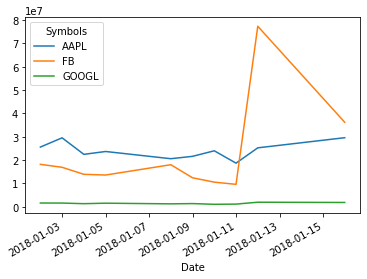

In [49]:
stock['Volume'].head(10).plot()
# secara default akan memvisualisasikan line plot (garis)

matplotlib.axes._subplots.AxesSubplot

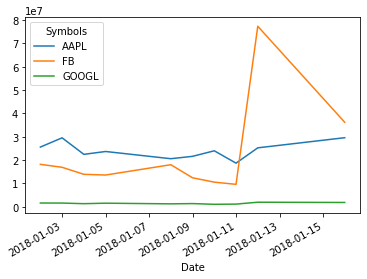

In [50]:
type(stock['Volume'].head(10).plot())

Insight:
- Volume FB pada tanggal 12 Januari 2018 terjadi lonjakan
- Volume FB memiliki fluktuasi yang tinggi

Cukup mudah bukan? Method `plot()` sudah mempermudah kita dalam melakukan visualisasi langsung pada DataFrame, tanpa perlu mengerti cara penggunaan `matplotlib`. Kunjungi [dokumentasi matplotlib](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) untuk detail mengenai `matplotlib`.

Namun, keterbatasan dari penggunaan `plot()` adalah minim kustomisasi dari visualisasi yang ada. Hanya terbatas pada parameter yang ada di dalam method tersebut. Kunjungi [dokumentasi method plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

Salah satu kustomisasi yang dapat kita lakukan untuk memperindah visualisasi adalah melalui [matplotlib style sheet](https://matplotlib.org/tutorials/introductory/customizing.html). Kita dapat mengganti nilai 'default' pada method `plt.style.use()` dengan salah satu style yang tersedia, kemudian jalankan kembali code visualisasi untuk menerapkan style yang dipilih.

💡 **Tips:** Meskipun kode kita tidak menggunakan `matplotlib` secara eksplisit namun bergantung pada implementasi `pandas`, alangkah lebih baik kita tetap melakukan import untuk berinteraksi dengan plot: `import matplotlib.pyplot as plt`.

In [51]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='Date'>

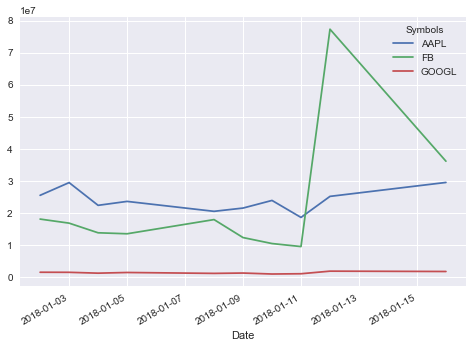

In [52]:
stock['Volume'].head(10).plot()

Sekarang kita coba visualisasi dari object `aapl` berikut:

In [53]:
march = pd.date_range(start="2018-03-01", end="2019-03-31")
aapl = stock.xs('AAPL', level='Symbols', axis=1)
aapl = aapl.reindex(march)
aapl

Attributes,High,Low,Open,Close,Volume,Adj Close
2018-03-01,179.779999,172.660004,178.539993,175.000000,48802000.0,172.375214
2018-03-02,176.300003,172.449997,172.800003,176.210007,38454000.0,173.567078
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05,177.740005,174.520004,175.210007,176.820007,28401400.0,174.167923
...,...,...,...,...,...,...
2019-03-27,189.759995,186.550003,188.750000,188.470001,29848400.0,188.470001
2019-03-28,189.559998,187.529999,188.949997,188.720001,20780400.0,188.720001
2019-03-29,190.080002,188.539993,189.830002,189.949997,23564000.0,189.949997
2019-03-30,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

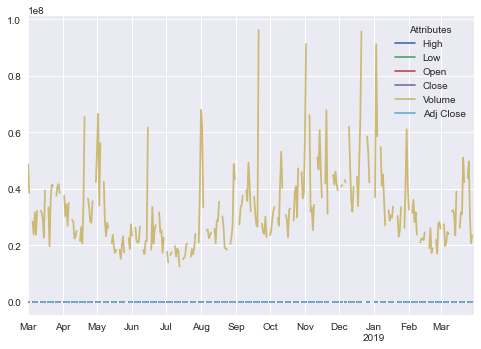

In [54]:
aapl.plot()
# secara default: line plot

Note:

- Index (`Date`) akan menjadi sumbu horizontal pada plot
- Nilai pada masing-masing kolom (`Attributes`) akan menjadi 1 komponen pada plot, dalam hal ini menjadi garis

**Diskusi:** Apakah visualisasi tersebut sudah cukup informatif dan tepat? Apabila belum, hal apa saja yang bisa di-improve dari visualisasi tersebut?


- Dipisah antara volume dengan price (OHLC)
- Mengisi missing value pada data: ffill
- Keterangan teks seperti judul, sumbu x, sumbu y

<AxesSubplot:title={'center':'AAPL Stock Opening and Closing Price'}, xlabel='Date', ylabel='Price (in USD)'>

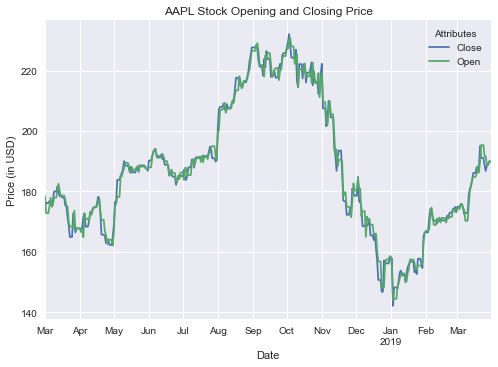

In [55]:
aapl[['Close', 'Open']].fillna(method='ffill').plot(
    xlabel = "Date",
    ylabel = "Price (in USD)",
    title = "AAPL Stock Opening and Closing Price"
)

Komponen pada plot: https://matplotlib.org/stable/gallery/showcase/anatomy.html

**END OF DAY 2**

---

**START OF DAY 3**

## Types of Visualization

Secara default, `plot()` menampilkan visualisasi **line chart**. Ada beberapa tipe visualisasi lain yang dapat kita buat menggunakan `.plot`:

Visualisasi berikut hanya perlu menggunakan **satu** kolom:

- Data kategorik:
    - **`.plot.bar()` atau `.plot.barh()` untuk barplot (diagram batang)**
    - **`.plot.box()` atau `.boxplot()` untuk boxplot (berhubungan dengan five number summary)**
    - `.plot.pie()` untuk pie chart
    

- Data numerik:
    - **`.plot.hist()` untuk histogram**
    - `.plot.kde()` atau `.plot.density()` untuk density plot
    - `.plot.area()` untuk area plot

Visualisasi berikut perlu menggunakan **dua** kolom:

- numerik vs numerik:
    - `.plot.scatter()` untuk scatter plot
    - `.plot.hexbin()` untuk hexagonal bin plot

💡 Panduan untuk menentukan tipe visualisasi yang tepat:

- Berdasarkan tujuan: https://askalgo-py.netlify.app/docs/dwv#bagaimana-cara-menentukan-jenis-visualisasi-yang-tepat
- Berdasarkan tipe data: https://www.data-to-viz.com/

**Silahkan mengacu referensi lengkapnya di [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) untuk method `plot` apabila ingin eksplor visualisasi yang ada di luar lingkup course ini**

### Bar plot

Menggunakan data `stock`, tampilkan visualisasi untuk **membandingkan** fluktuasi nilai `Open` pada masing-masing `Symbols`.

<AxesSubplot:xlabel='Symbols'>

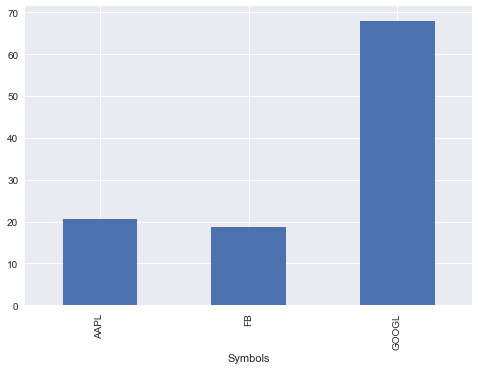

In [56]:
stock['Open'].std().plot(kind='bar')

Insight:

- GOOGL memiliki nilai fluktuasi yang tertinggi
- FB memiliki nilai fluktuasi yang terendah

Improvement:

- Mengurutkan dari terbesar ke terkecil (descending)

<AxesSubplot:xlabel='Symbols'>

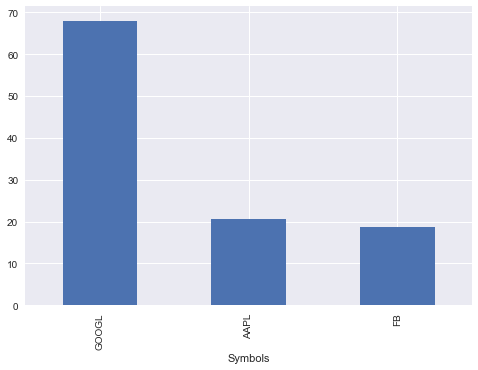

In [57]:
stock['Open'].std().sort_values(ascending=False).plot(kind='bar')

Gunakan parameter `kind='barh'` untuk menampilkan bar chart secara horizontal (mendatar)

<AxesSubplot:ylabel='Symbols'>

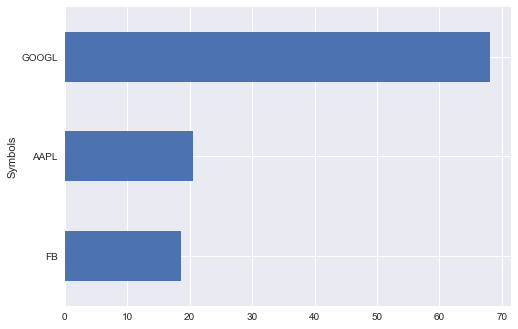

In [58]:
stock['Open'].std().sort_values().plot(kind='barh')

Insight: Saham dengan nilai `Open` paling berfluktuasi adalah `GOOGL`

### Histogram

Menggunakan data `stock`, tampilkan visualisasi histogram untuk mengetahui **persebaran** `Volume` pada saham `GOOGL`:

Ingat kembali:

- `()`: fungsi atau method, contohnya `.xs()`
- `[]`: mengambil kolom/subsetting

In [59]:
stock['Volume']['GOOGL']

Date
2018-01-02    1588300.0
2018-01-03    1565900.0
2018-01-04    1302600.0
2018-01-05    1512500.0
2018-01-08    1232200.0
                ...    
2019-04-17    1518300.0
2019-04-18    1237500.0
2019-04-22     954200.0
2019-04-23    1593400.0
2019-04-24    1169800.0
Name: GOOGL, Length: 329, dtype: float64

<AxesSubplot:ylabel='Frequency'>

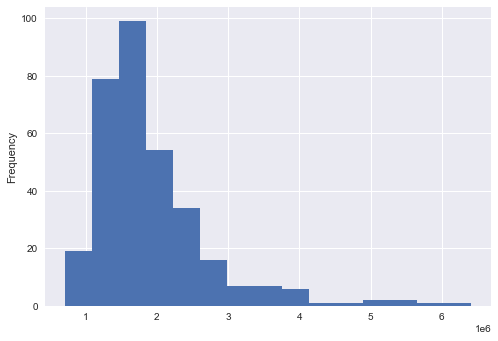

In [60]:
stock['Volume']['GOOGL'].plot(kind='hist', bins=15)
# bins = banyaknya batang

Insight: Volume `GOOGL` paling banyak berkisar di antara nilai 1-3 juta

Note: 1e6 adalah notasi scientific untuk 10 pangkat 6 artinya dalam satuan juta

### Knowledge Check: Bar plot vs Histogram

Setelah membuat kedua plot di atas, apa perbedaan antara bar plot dengan histogram?

- Barplot digunakan untuk ranking/membandingkan sebuah nilai dari data kategori
- Histogram digunakan untuk melihat sebaran data numerik

### Box plot

Menggunakan data `stock`, tampilkan visualisasi box plot untuk membandingkan **persebaran** `Volume` untuk ketiga saham.

In [61]:
stock['Volume']

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,25555900.0,18151900.0,1588300.0
2018-01-03,29517900.0,16886600.0,1565900.0
2018-01-04,22434600.0,13880900.0,1302600.0
2018-01-05,23660000.0,13574500.0,1512500.0
2018-01-08,20567800.0,17994700.0,1232200.0
...,...,...,...
2019-04-17,28906800.0,9973700.0,1518300.0
2019-04-18,24195800.0,11655600.0,1237500.0
2019-04-22,19439500.0,13389900.0,954200.0


<AxesSubplot:>

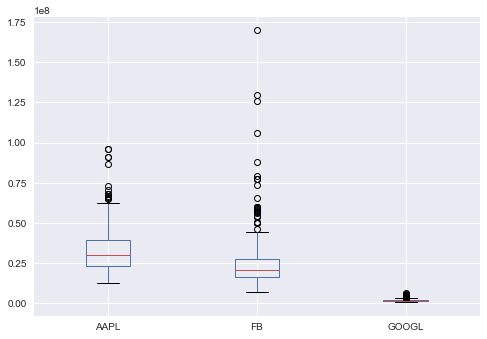

In [62]:
stock['Volume'].plot(kind='box')

Box plot menggambarkan **five number summary** sebagai berikut: 

<img src="assets/boxplot.png" width="600"/>

- min: minimum value (bedakan dengan pagar bawah / lower whisker)
- 25%: kuartil 1
- 50%: kuartil 2 atau median
- 75%: kuartil 3
- max: maximum value (bedakan dengan pagar atas / upper whisker)

In [63]:
stock.describe()['Volume']

Symbols,AAPL,FB,GOOGL
count,3.290000e+02,3.290000e+02,3.290000e+02
mean,3.309932e+07,2.559525e+07,1.924978e+06
std,1.409785e+07,1.779957e+07,8.330000e+05
min,1.251390e+07,7.297400e+06,7.089000e+05
25%,2.327180e+07,1.629230e+07,1.391300e+06
50%,2.985580e+07,2.075050e+07,1.721100e+06
75%,3.937300e+07,2.774460e+07,2.182000e+06
max,9.624670e+07,1.698037e+08,6.411000e+06


Tambahkan parameter `vert=False` untuk melihat boxplot secara horizontal:

<AxesSubplot:>

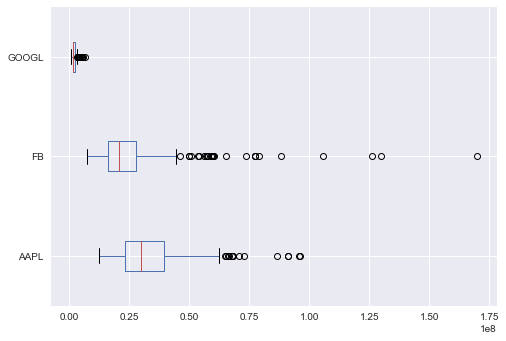

In [64]:
stock['Volume'].plot(kind='box', vert=False)

Note: visualisasi boxplot di atas kurang tepat, karena dalam dunia saham kita tidak boleh langsung membandingkan nilai volumenya secara absolute, melainkan biasanya kita melihatnya secara relatif / persentasenya.

**Latihan**: Tampilkan persebaran Volume GOOGL untuk masing-masing periode bulannya (year-month)

Note: Method `.boxplot()` akan mempermudah Anda ketika data sudah berupa long DataFrame

- Memindahkan index `Date` menjadi kolom
- Mengekstrak periode bulanan dari `Date` menggunakan `.dt.to_period()`

In [65]:
# mempersiapkan data
volume_googl = stock['Volume'][['GOOGL']].reset_index()
volume_googl['Monthly'] = volume_googl['Date'].dt.to_period('M')
volume_googl

Symbols,Date,GOOGL,Monthly
0,2018-01-02,1588300.0,2018-01
1,2018-01-03,1565900.0,2018-01
2,2018-01-04,1302600.0,2018-01
3,2018-01-05,1512500.0,2018-01
4,2018-01-08,1232200.0,2018-01
...,...,...,...
324,2019-04-17,1518300.0,2019-04
325,2019-04-18,1237500.0,2019-04
326,2019-04-22,954200.0,2019-04
327,2019-04-23,1593400.0,2019-04


Text(0, 0.5, 'Monthly Period')

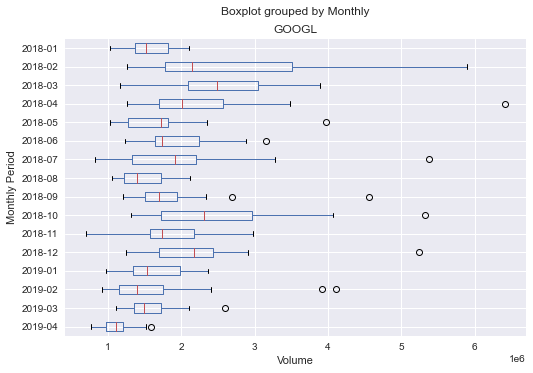

In [66]:
# visualisasi
ax = volume_googl.boxplot(column='GOOGL', by='Monthly', vert=False)
ax.invert_yaxis()
ax.set_xlabel("Volume")
ax.set_ylabel("Monthly Period")

Insight:

- Dari median: Secara **overall**, volume GOOGL tertinggi terletak pada periode 2018-03, sedangkan paling rendah pada 2019-04
- Dari lebar kotak (IQR atau selisih 75% dengan 25%): Volume GOOGL yang paling bervariasi adalah pada periode 2018-02, sedangkan yang paling tidak bervariasi pada periode 2019-04
- Dari outlier: Volume GOOGL yang paling ekstrim terletak pada periode 2018-04

## (Additional) Other Python Libraries for Visualization

Apabila Anda tertarik mengenai visualisasi di Python, silahkan eksplorasi lebih lanjut package-package berikut:

- `matplotlib`: semua elemen pada visualisasi dapat dikustomisasi, namun membutuhkan code yang lebih panjang. [Dokumentasi Matplotlib](https://matplotlib.org/3.2.2/tutorials/index.html) 
- `seaborn`: dikembangkan dari `matplotlib`, lebih sedikit yang dapat dikustomisasi namun lebih mudah. [Dokumentasi Seaborn](https://seaborn.pydata.org/introduction.html)
- `plotly`: plot interaktif serta kompatibilitas dengan bahasa lain yang tinggi. [Dokumentasi Plotly](https://plotly.com/python/)
- `altair`: plot interaktif yang bersifat deklaratif, code relatif lebih mudah. [Dokumentasi Altair](https://altair-viz.github.io/index.html)

Referensi perbandingan library: https://askalgo-py.netlify.app/docs/dwv#adakah-library-visualisasi-data-di-python-selain-matplotlib

# Group By: Aggregation Table

Reshaping data adalah salah satu komponen penting dalam tahap data wrangling, karena memungkinkan seorang analis untuk mempersiapkan data menjadi bentuk yang sesuai untuk tahap analisa data berikutnya.

Teknik yang tak kalah penting adalah operasi **group by**. Mungkin untuk Anda yang sudah pernah menggunakan SQL atau tools lain seperti `tidyverse` pada bahasa R akan familiar dengan operasi group by ini.

Misalkan kita punya dataframe `close_melted` yang ingin kita bandingkan nilai `Close` hariannya pada saham AAPL, FB, dan GOOGL:

In [67]:
close = stock.xs('Close', level='Attributes', axis=1)
close_melted = close.reset_index().melt(id_vars='Date', value_name='Close')
close_melted

,Date,Symbols,Close
0,2018-01-02,AAPL,172.259995
1,2018-01-03,AAPL,172.229996
2,2018-01-04,AAPL,173.029999
3,2018-01-05,AAPL,175.000000
4,2018-01-08,AAPL,174.350006
...,...,...,...
982,2019-04-17,GOOGL,1240.140015
983,2019-04-18,GOOGL,1241.469971
984,2019-04-22,GOOGL,1253.760010
985,2019-04-23,GOOGL,1270.589966


**Pertanyaan**: Di antara AAPL, FB, GOOGL, manakah saham yang memiliki **rata-rata** `Close` harian tertinggi?

Pertama, coba buatlah tabel agregasi dengan `crosstab()` dan juga `pivot_table()`:

In [68]:
pd.options.display.float_format = '{:.3f}'.format

In [69]:
# versi crosstab
pd.crosstab(index=close_melted['Symbols'],
            columns='Mean Close',
            values=close_melted['Close'],
            aggfunc='mean')

col_0,Mean Close
Symbols,
AAPL,186.012
FB,169.510
GOOGL,1128.668


In [70]:
# versi pivot_table: Bu Ika, Pak Kiki, Bu Ani

close_melted.pivot_table(
            index='Symbols',
            values='Close',
            aggfunc='mean'
)

,Close
Symbols,
AAPL,186.012
FB,169.510
GOOGL,1128.668


**Ingat kembali:** 

Persamaan antara `crosstab` dan `pivot_table` yaitu keduanya dapat digunakan untuk menghasilkan tabel agregasi yang memiliki parameter `index`, `columns`, `values`, and `aggfunc`.

Perbedaan antara `crosstab` dan `pivot_table` dapat dirangkum dalam tabel berikut:

|                                                                                    | `pd.crosstab()` | `pd.pivot_table()` |
|------------------------------------------------------------------------------------|-----------------|--------------------|
|                                                                          **Input** | Array of values/Series |          DataFrame (parameter `data`)|
|                                                              **Default `aggfunc`** |       `'count'` |           `'mean'` |
|                                                          **Parameter `columns`** |       Mandatory |      Optional |
|                                                          **Parameter `normalize`** |       Available |      Not Available |
| [**Computation Time**](https://ramiro.org/notebook/pandas-crosstab-groupby-pivot/) | Relatively Slower |  Relatively Faster |

Bandingkan dengan method `groupby()`:

In [71]:
# versi groupby
close_melted.groupby('Symbols').mean()

,Close
Symbols,
AAPL,186.012
FB,169.510
GOOGL,1128.668


Istilah **group by** merupakan gabungan dari proses:

1. Split: mengelompokkan baris, co: dikelompokkan berdasarkan `Symbols`
2. Apply: menerapkan fungsi untuk masing-masing kelompok, co: dihitung mean untuk masing-masing `Symbols`
3. Combine: mengembalikan hasil dalam bentuk 1 tabel

Ilustrasi proses **split-apply-combine** dapat dilihat pada [Google Sheet](https://docs.google.com/spreadsheets/d/1CZHW4W_Ps9ggB-S6r_9ueozib-laXbEs8XZ8vUcO8P8/edit?usp=sharing)

## Visualizing Barchart for Comparison

Sampai di sini kita tahu bahwa GOOGL memiliki rata-rata `Close` transaksi harian tertinggi dari visualisasi bar plot yang dihasilkan pada bagian sebelumnya. Untuk selanjutnya, mari kita menganalisa `Close` dari saham GOOGL. Kita bisa menggunakan method `day_name()` untuk mengekstrak nama hari dari `Date`:

In [72]:
googl = stock.xs('GOOGL', level='Symbols', axis=1).copy()
googl['Close_Diff'] = googl['Close'].diff()
googl['Weekday'] = googl.index.day_name()
googl

Attributes,High,Low,Open,Close,Volume,Adj Close,Close_Diff,Weekday
Date,,,,,,,,
2018-01-02,1075.980,1053.020,1053.020,1073.210,1588300.000,1073.210,nan,Tuesday
2018-01-03,1096.100,1073.430,1073.930,1091.520,1565900.000,1091.520,18.310,Wednesday
2018-01-04,1104.080,1094.260,1097.090,1095.760,1302600.000,1095.760,4.240,Thursday
2018-01-05,1113.580,1101.800,1103.450,1110.290,1512500.000,1110.290,14.530,Friday
2018-01-08,1119.160,1110.000,1111.000,1114.210,1232200.000,1114.210,3.920,Monday
...,...,...,...,...,...,...,...,...
2019-04-17,1245.100,1232.900,1237.000,1240.140,1518300.000,1240.140,8.230,Wednesday
2019-04-18,1245.940,1239.410,1245.000,1241.470,1237500.000,1241.470,1.330,Thursday
2019-04-22,1254.340,1233.370,1236.670,1253.760,954200.000,1253.760,12.290,Monday


Perhatikan kolom `Close_Diff` yang dibuat di atas, nilai ini merupakan perbedaan antara nilai `Close` pada hari tertentu dengan hari berikutnya.

**Kasus:** Misalkan kita ingin membandingkan `Close_Diff` di setiap hari kerja. Untuk saham GOOGL, apakah secara rata-rata pada hari Kamis (Thursday) mencatat perbedaan yang lebih tinggi dibandingkan dengan hari Jumat (Friday)?

In [73]:
googl.groupby('Weekday').mean()['Close_Diff']

Weekday
Friday      -1.454
Monday      -1.069
Thursday     1.058
Tuesday      1.649
Wednesday    2.527
Name: Close_Diff, dtype: float64

In [74]:
# alternatif cara penulisan
googl.groupby('Weekday')['Close_Diff'].mean()

Weekday
Friday      -1.454
Monday      -1.069
Thursday     1.058
Tuesday      1.649
Wednesday    2.527
Name: Close_Diff, dtype: float64

Syntax: 

- `dataframe.groupby([INDEX/COLUMNS]).AGGFUNC()[VALUES]`
atau
- `dataframe.groupby([INDEX/COLUMNS])[VALUES].AGGFUNC()`

<AxesSubplot:xlabel='Weekday'>

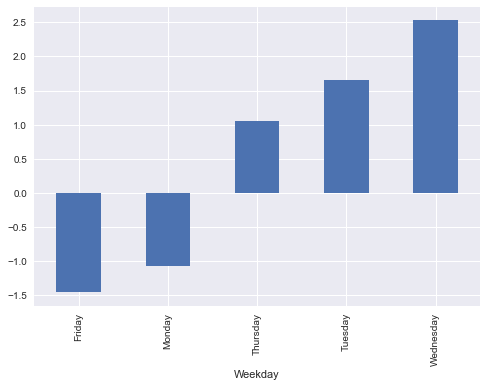

In [75]:
# contoh visualisasi yang kurang tepat
googl.groupby('Weekday').mean()['Close_Diff'].plot(kind='bar')

**Diskusi:** Apakah plot di atas sudah cukup efektif? Kalau belum, apa yang perlu diperbaiki dari plot di atas?

- Weekday harus diurutkan karena merupakan tipe data ordinal (order): hari Senin, Selasa, ..., Jumat

<!--
googl_wday = googl.groupby('Weekday').mean()['Close_Diff']
googl_wday.index


wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
googl_wday.index = pd.CategoricalIndex(data = googl_wday.index,
                                       categories = wday,
                                       ordered = True)
googl_wday.index
-->

In [76]:
googl_wday = googl.groupby('Weekday').mean()['Close_Diff']
googl_wday.index
# secara default diurutkan berdasarkan alfabetikal A-Z

Index(['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'], dtype='object', name='Weekday')

In [77]:
wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
googl_wday.index = pd.CategoricalIndex(data = googl_wday.index,
                                       categories = wday,
                                       ordered = True)
googl_wday.index

CategoricalIndex(['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], ordered=True, name='Weekday', dtype='category')

<AxesSubplot:xlabel='Weekday'>

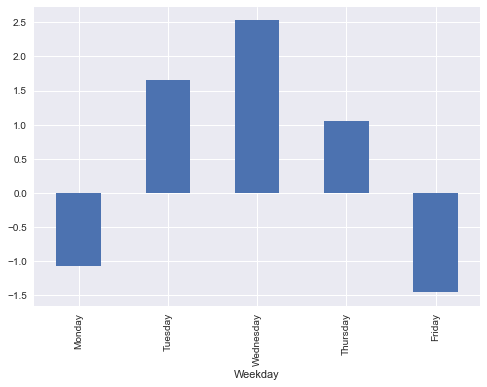

In [78]:
googl_wday.sort_index().plot(kind='bar')

Insight: Ternyata di hari Thursday `Close_Diff`nya lebih besar dibandingkan hari Friday.

## Using Grouped Barchart

Masih ingat dengan dataframe `closingprice`? Kita akan coba memvisualisasikan **grouped barchart** untuk membandingkan nilai `Close` untuk ketiga saham **setiap bulannya** pada kuartal pertama tahun 2019.

- Pertama, kita memastikan `closingprice` tidak memiliki missing values dengan melakukan imputasi forward dan backward fill.
- Selanjutnya, gunakan objek `closingprice` untuk menampilkan nilai **rata-rata** `Close` untuk setiap bulannya. Simpan tabel agregasi ke objek `average_closing`.

Note: untuk mengambil nama bulan tidak perlu `.dt` lagi, karena sudah berupa objek DatetimeIndex.

In [79]:
closingprice = closingprice.ffill().bfill()
closingprice['Month'] = closingprice.index.month_name()
average_closing = closingprice.groupby('Month').mean()
average_closing

Symbols,AAPL,FB,GOOGL
Month,,,
February,171.210,164.601,1119.318
January,154.274,145.200,1082.756
March,183.199,166.885,1181.212


Visualisasi:

- Index menjadi sumbu horizontal
- Column menjadi grouping untuk bar chartnya

<AxesSubplot:xlabel='Month'>

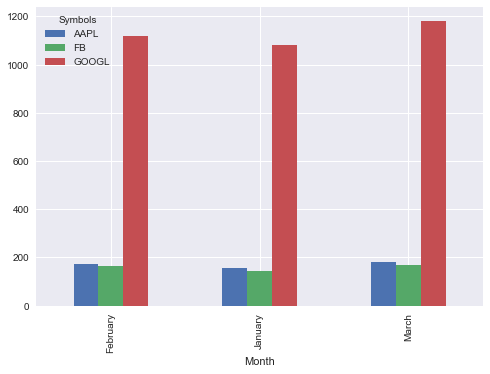

In [80]:
# contoh visualisasi yang kurang tepat
average_closing.plot(kind='bar')

**Diskusi:** Apakah plot di atas sudah cukup efektif? Kalau belum, apa yang perlu diperbaiki dari plot di atas?

- Month harus diurutkan karena merupakan tipe data ordinal (order): bulan Januari, Februari, ...

<!--
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_closing.index = pd.CategoricalIndex(data=...,
                                            categories=...,
                                            ordered=...)
-->

In [81]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_closing.index = pd.CategoricalIndex(data=average_closing.index, # yang mau kita urutkan
                                            categories=months, # hasil yg sudah terurut
                                            ordered=True)

<AxesSubplot:xlabel='Month'>

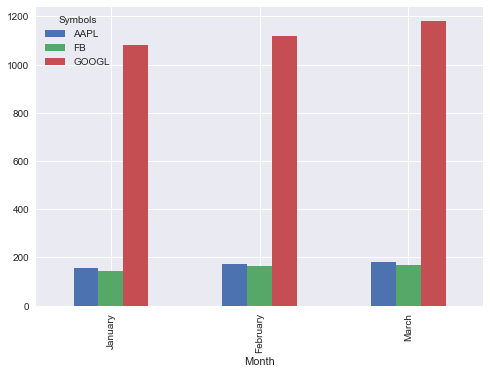

In [82]:
average_closing.sort_index().plot(kind='bar')

<AxesSubplot:ylabel='Month'>

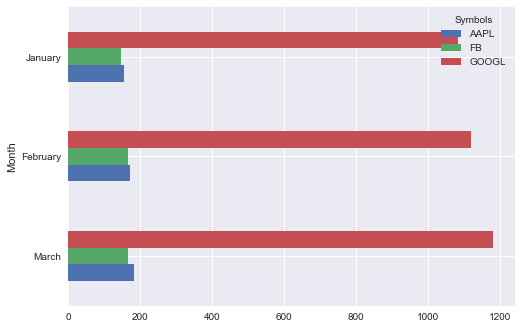

In [83]:
average_closing.sort_index(ascending=False).plot(kind='barh')

Insight:

- Rata-rata nilai Close untuk saham GOOGL paling tertinggi, sedangkan paling rendah FB

## Knowledge Check: Group By + Reshaping

Misal Anda dihadapkan dengan long DataFrame seperti pada `closingprice_melt` berikut:

In [84]:
closingprice_melt = closingprice.melt(id_vars='Month', value_name='Close')
closingprice_melt

,Month,Symbols,Close
0,January,AAPL,157.920
1,January,AAPL,157.920
2,January,AAPL,142.190
3,January,AAPL,148.260
4,January,AAPL,148.260
...,...,...,...
265,March,GOOGL,1178.010
266,March,GOOGL,1172.270
267,March,GOOGL,1176.890
268,March,GOOGL,1176.890


Kira-kira bagaimana cara kita mengubah bentuk `closingprice_melt` menjadi `average_closing`?

**Hint:** Gunakan teknik `groupby` dan juga reshaping

In [85]:
average_closing

Symbols,AAPL,FB,GOOGL
Month,,,
February,171.210,164.601,1119.318
January,154.274,145.200,1082.756
March,183.199,166.885,1181.212


In [100]:
# your code here

# Pak Calvin
# agregasi
# reshaping dengan unstack untuk mengubah level Symbols dari index ke kolom
closingprice_melt.groupby(['Symbols', 'Month']).mean().unstack('Symbols')

Close                 
Symbols     AAPL      FB    GOOGL
Month                            
February 171.210 164.601 1119.318
January  154.274 145.200 1082.756
March    183.199 166.885 1181.212

In [102]:
# kalau urutan groupby dibalik
closingprice_melt.groupby(['Month', 'Symbols']).mean().unstack()

Close                 
Symbols     AAPL      FB    GOOGL
Month                            
February 171.210 164.601 1119.318
January  154.274 145.200 1082.756
March    183.199 166.885 1181.212

Ilustrasi group by pada kasus di atas dapat dilihat pada [Google Sheet](https://docs.google.com/spreadsheets/d/1CZHW4W_Ps9ggB-S6r_9ueozib-laXbEs8XZ8vUcO8P8/edit#gid=1358100451)

## Combining `agg` and `groupby`

Perhatikan group by operation di bawah ini yang di-chaining dengan aggregate method `mean()`:

In [87]:
stock_long = stock.stack().reset_index()
stock_long

Attributes,Date,Symbols,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,AAPL,172.300,169.260,170.160,172.260,25555900.000,168.987
1,2018-01-02,FB,181.580,177.550,177.680,181.420,18151900.000,181.420
2,2018-01-02,GOOGL,1075.980,1053.020,1053.020,1073.210,1588300.000,1073.210
3,2018-01-03,AAPL,174.550,171.960,172.530,172.230,29517900.000,168.958
4,2018-01-03,FB,184.780,181.330,181.880,184.670,16886600.000,184.670
...,...,...,...,...,...,...,...,...
982,2019-04-23,FB,184.220,181.480,182.740,183.780,19954800.000,183.780
983,2019-04-23,GOOGL,1274.430,1251.970,1256.640,1270.590,1593400.000,1270.590
984,2019-04-24,AAPL,208.480,207.050,207.360,207.160,17540600.000,207.160
985,2019-04-24,FB,185.140,181.650,184.490,182.580,37289900.000,182.580


In [88]:
stock_long.groupby('Symbols').mean()

# dari High sampai Adj Close -> dihitung rata-ratanya

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,,,,,,
AAPL,187.796,184.148,185.930,186.012,33099323.100,184.382
FB,171.488,167.375,169.366,169.510,25595249.544,169.510
GOOGL,1140.358,1116.312,1128.532,1128.668,1924978.116,1128.668


In [89]:
stock_long

Attributes,Date,Symbols,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,AAPL,172.300,169.260,170.160,172.260,25555900.000,168.987
1,2018-01-02,FB,181.580,177.550,177.680,181.420,18151900.000,181.420
2,2018-01-02,GOOGL,1075.980,1053.020,1053.020,1073.210,1588300.000,1073.210
3,2018-01-03,AAPL,174.550,171.960,172.530,172.230,29517900.000,168.958
4,2018-01-03,FB,184.780,181.330,181.880,184.670,16886600.000,184.670
...,...,...,...,...,...,...,...,...
982,2019-04-23,FB,184.220,181.480,182.740,183.780,19954800.000,183.780
983,2019-04-23,GOOGL,1274.430,1251.970,1256.640,1270.590,1593400.000,1270.590
984,2019-04-24,AAPL,208.480,207.050,207.360,207.160,17540600.000,207.160
985,2019-04-24,FB,185.140,181.650,184.490,182.580,37289900.000,182.580


Misalkan kita ingin membuat tabel agregasi dengan `aggfunc` yang berbeda-beda untuk masing-masing `Symbols` berupa:
- Maximum `stock` price (`max` dari `High`)
- Minimum `stock` price (`min` dari `Low`)
- Rata-rata closing price (`mean` dari `Close`)

Untuk mendapat hasil tersebut, kita harus melakukan chaining `groupby` dengan method `agg`. Kita harus menyertakan mapping (**dictionary**) untuk setiap kolom dengan fungsi agregasinya seperti berikut ini:

Syntax:

```
.agg({
    'NAMA_KOLOM': 'FUNGSI_AGREGASI'
})
```

In [90]:
stock_summary = stock_long.groupby('Symbols').agg({
    'Close': 'mean',
    'High': 'max',
    'Low': 'min'
})
stock_summary

,Close,High,Low
Symbols,,,
AAPL,186.012,233.470,142.000
FB,169.510,218.620,123.020
GOOGL,1128.668,1291.440,977.660


In [91]:
# OPTIONAL: mengubah nama kolom
stock_summary.rename(columns={
    'Close': 'Mean Close',
    'High': 'Max High',
    'Low': 'Min Low'
})

,Mean Close,Max High,Min Low
Symbols,,,
AAPL,186.012,233.470,142.000
FB,169.510,218.620,123.020
GOOGL,1128.668,1291.440,977.660


In [92]:
# OPTIONAL: mengubah nama index
stock_summary.rename(index={
    'AAPL': 'Apple Inc.',
    'FB': 'Facebook',
    'GOOGL': 'Google'
})

,Close,High,Low
Symbols,,,
Apple Inc.,186.012,233.470,142.000
Facebook,169.510,218.620,123.020
Google,1128.668,1291.440,977.660


Visualisasikan tabel agregasi di atas untuk membandingkan nilai tersebut:

<AxesSubplot:xlabel='Symbols'>

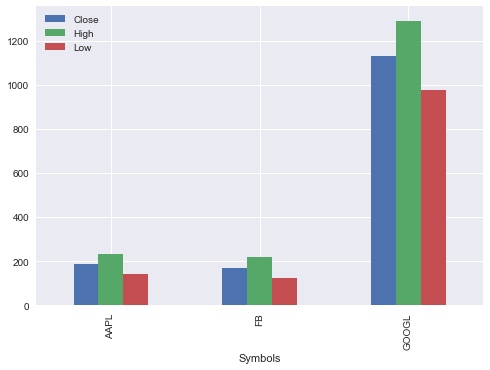

In [93]:
stock_summary.plot(kind='bar')

Insight:

- Untuk nilai saham GOOGL lebih tinggi dibandingkan kedua saham lainnya, dari segi max High, min Low, dan mean Close
- Sedangkan untuk saham AAPL dan FB kurang lebih sama

## Knowledge Check: Vizualization

Perhatikan dataframe `monthly_closing` berikut:

In [94]:
stock['YearMonth'] = stock.index.to_period('M')
monthly_closing = stock.groupby('YearMonth').mean()['Close']
monthly_closing.head()

Symbols,AAPL,FB,GOOGL
YearMonth,,,
2018-01,174.005,184.963,1139.394
2018-02,167.639,180.269,1091.880
2018-03,174.496,173.490,1093.769
2018-04,169.834,163.810,1039.952
2018-05,185.537,182.930,1074.853


Tipe plot mana yang paling sesuai untuk data di atas, apabila kita ingin melihat pergerakan nilai `Close` dari waktu ke waktu?

- [x] Line plot `.plot()`
- [ ] Scatter plot `.plot.scatter(x, y)`
- [ ] Bar plot `.plot.bar()`
- [ ] Box plot `.plot.box()`

<AxesSubplot:xlabel='YearMonth'>

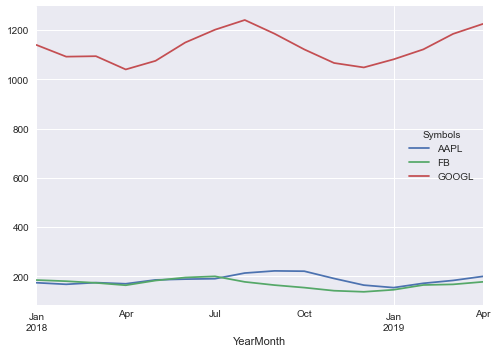

In [103]:
# your code here
monthly_closing.plot()
# secara default: line plot